In [1]:
import glob

import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
from matplotlib import cm

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('svg') # set it here to 'png' or 'svg'

import seaborn as sns
#sns.set()
# Use white grid plot background from seaborn
sns.set(style="whitegrid")

# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#PLT_STYLE='Solarize_Light2'
PLT_STYLE='seaborn-paper'

In [26]:
df = pd.read_csv("children-posthoc-questionnaires.csv").set_index("id")
df

,year_group,age,gender,Q1,Q2,Q3,Q4,Q5,Q6,Q7,...,ATTENTION-sb12,ESCAPE-sb13,TANGIBLE-sb14,ATTENTION-sb15,ESCAPE-sb16,ESCAPE-sb17,SENSORY-sb18,ESCAPE-sb19,TANGIBLE-sb20,SENSORY-sb21
id,,,,,,,,,,,,,,,,,,,,,
S1,6,11,m,3,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S2,6,11,m,5,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
S3,6,11,m,2,3,3,2,4,3,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S4,6,11,m,4,4,4,3,5,3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S5,6,11,m,3,5,4,2,5,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S6,6,11,m,5,3,4,2,4,4,5,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
S7,8,13,m,3,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S8,7,12,f,4,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
S9,8,13,m,5,5,5,5,4,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
questions = [
    "How much do you like robots in general (not just Pepper)?",
    "How much do you like our Pepper?",
    "Do you want Pepper to stay longer at school?",
    "Do you think Pepper was useful to you?",
    "Do you think Pepper is useful for the school?",
    "I think Pepper is... boring/entertaining",
    "I think Pepper is... mean/friendly",
    "Do you think Pepper could become your friend?"
]

# Perception of the robot

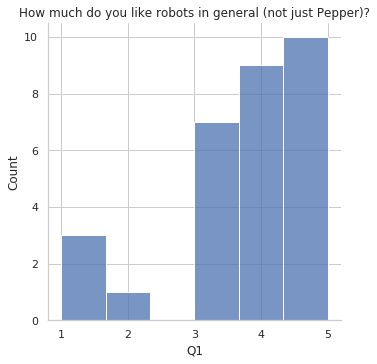

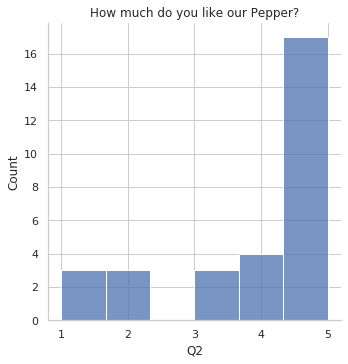

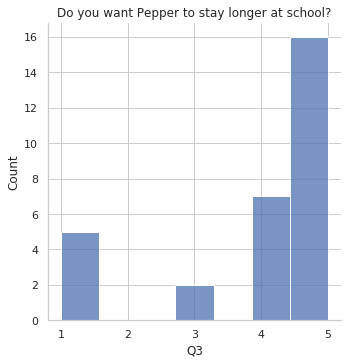

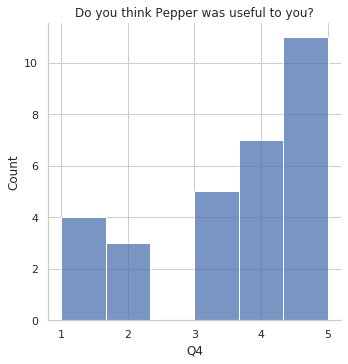

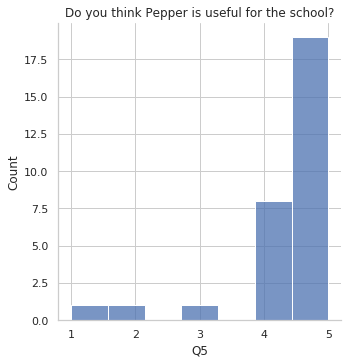

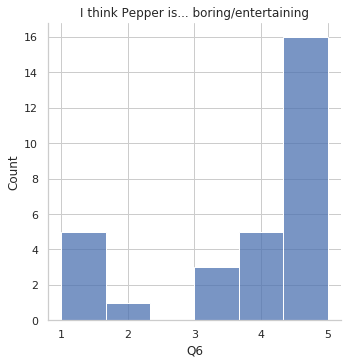

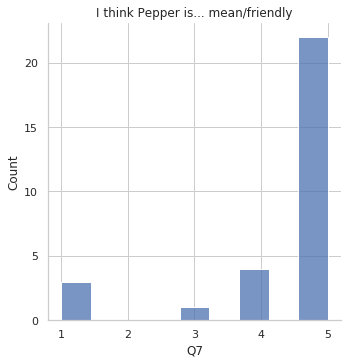

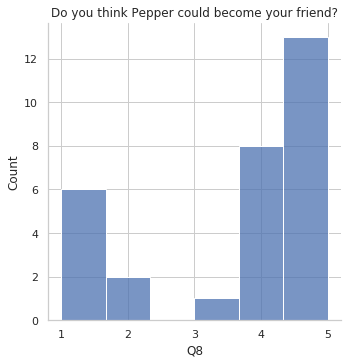

In [34]:
for idx in range(1,9):
    sns.displot(df["Q%s" % idx])
    plt.title(questions[idx-1])

In [20]:
df_reasons = pd.DataFrame(columns=["type"] + list(df.index))

for idx, row in df.T.iterrows():
    type = idx.split("-")[0]
    if type in ["ATTENTION", "ESCAPE", "TANGIBLE", "SENSORY"]:
        df_reasons.loc[idx] = [type] + list(row)


In [24]:
    
df_reasons.groupby("type").count().sum()

S1      0
S2      3
S3      1
S4      0
S5      2
S6      3
S7      0
S8      0
S9      0
S10    10
S11     1
S12     1
S13     8
X      21
S15     2
S16     2
S17     3
S18     7
S19     0
S20    15
F       4
S22    11
S23     7
S24     0
S25     1
S26     6
S27     0
L      17
S29     0
S30     5
dtype: int64